In [2]:
from IPython.display import clear_output
!pip install imutils
clear_output()

In [3]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot

from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

print("All modules have been imported")


All modules have been imported


In [8]:
# Create new folders
!mkdir TRAIN TEST VAL TRAIN\YES TRAIN\NO TEST\YES TEST\NO VAL\YES VAL\NO

# Display the folder structure
!tree /F


Folder PATH listing for volume Windows
Volume serial number is F472-AE01
C:.
¦   .bash_history
¦   .condarc
¦   .emulator_console_auth_token
¦   .git-for-windows-updater
¦   .gitconfig
¦   .lesshst
¦   Inception.ipynb
¦   Resnet.ipynb
¦   resnet50_.ipynb
¦   Untitled1.ipynb
¦   Untitled2.ipynb
¦   Untitled3.ipynb
¦   vgg16.h5
¦   VGG16.ipynb
¦   
+---.android
¦   ¦   adbkey
¦   ¦   adbkey.pub
¦   ¦   analytics.settings
¦   ¦   debug.keystore
¦   ¦   debug.keystore.lock
¦   ¦   emu-last-feature-flags.protobuf
¦   ¦   emu-update-last-check.ini
¦   ¦   maps.key
¦   ¦   modem-nv-ram-5554
¦   ¦   modem-nv-ram-5556
¦   ¦   
¦   +---avd
¦   ¦   ¦   Pixel_XL_API_33.ini
¦   ¦   ¦   Resizable_API_33.ini
¦   ¦   ¦   
¦   ¦   +---Pixel_XL_API_33.avd
¦   ¦   ¦   ¦   AVD.conf
¦   ¦   ¦   ¦   cache.img
¦   ¦   ¦   ¦   cache.img.qcow2
¦   ¦   ¦   ¦   config.ini
¦   ¦   ¦   ¦   emu-launch-params.txt
¦   ¦   ¦   ¦   emulator-user.ini
¦   ¦   ¦   ¦   encryptionkey.img
¦   ¦   ¦   ¦   encryptionkey.img.qc

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




¦           ¦               ¦           ¦   ¦           ¦       TestOutputRedirector.java
¦           ¦               ¦           ¦   ¦           ¦       
¦           ¦               ¦           ¦   ¦           +---report
¦           ¦               ¦           ¦   ¦           ¦       AllTestResults.java
¦           ¦               ¦           ¦   ¦           ¦       ClassPageRenderer.java
¦           ¦               ¦           ¦   ¦           ¦       ClassTestResults.java
¦           ¦               ¦           ¦   ¦           ¦       CompositeTestResults.java
¦           ¦               ¦           ¦   ¦           ¦       DefaultTestReport.java
¦           ¦               ¦           ¦   ¦           ¦       LocaleSafeDecimalFormat.java
¦           ¦               ¦           ¦   ¦           ¦       OverviewPageRenderer.java
¦           ¦               ¦           ¦   ¦           ¦       PackagePageRenderer.java
¦           ¦               ¦           ¦   ¦           ¦       Package

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




¦           ¦               ¦           ¦   ¦   ¦       MavenPublishingAwareContext.java
¦           ¦               ¦           ¦   ¦   ¦       SoftwareComponentInternal.java
¦           ¦               ¦           ¦   ¦   ¦       UsageContext.java
¦           ¦               ¦           ¦   ¦   ¦       
¦           ¦               ¦           ¦   ¦   +---file
¦           ¦               ¦           ¦   ¦   ¦   ¦   BasicFileResolver.java
¦           ¦               ¦           ¦   ¦   ¦   ¦   CachingTaskInputFileCollection.java
¦           ¦               ¦           ¦   ¦   ¦   ¦   CalculatedTaskInputFileCollection.java
¦           ¦               ¦           ¦   ¦   ¦   ¦   CopyActionProcessingStreamAction.java
¦           ¦               ¦           ¦   ¦   ¦   ¦   DefaultArchiveOperations.java
¦           ¦               ¦           ¦   ¦   ¦   ¦   DefaultFileLookup.java
¦           ¦               ¦           ¦   ¦   ¦   ¦   DefaultFileOperations.java
¦           ¦              

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



¦   ¦   ¦   ¦   ¦       sl_SI.dat
¦   ¦   ¦   ¦   ¦       smn.dat
¦   ¦   ¦   ¦   ¦       smn_FI.dat
¦   ¦   ¦   ¦   ¦       sn.dat
¦   ¦   ¦   ¦   ¦       sn_ZW.dat
¦   ¦   ¦   ¦   ¦       so.dat
¦   ¦   ¦   ¦   ¦       so_DJ.dat
¦   ¦   ¦   ¦   ¦       so_ET.dat
¦   ¦   ¦   ¦   ¦       so_KE.dat
¦   ¦   ¦   ¦   ¦       so_SO.dat
¦   ¦   ¦   ¦   ¦       sq.dat
¦   ¦   ¦   ¦   ¦       sq_AL.dat
¦   ¦   ¦   ¦   ¦       sq_MK.dat
¦   ¦   ¦   ¦   ¦       sq_XK.dat
¦   ¦   ¦   ¦   ¦       sr.dat
¦   ¦   ¦   ¦   ¦       sr_Cyrl.dat
¦   ¦   ¦   ¦   ¦       sr_Cyrl_BA.dat
¦   ¦   ¦   ¦   ¦       sr_Cyrl_ME.dat
¦   ¦   ¦   ¦   ¦       sr_Cyrl_RS.dat
¦   ¦   ¦   ¦   ¦       sr_Cyrl_XK.dat
¦   ¦   ¦   ¦   ¦       sr_Latn.dat
¦   ¦   ¦   ¦   ¦       sr_Latn_BA.dat
¦   ¦   ¦   ¦   ¦       sr_Latn_ME.dat
¦   ¦   ¦   ¦   ¦       sr_Latn_RS.dat
¦   ¦   ¦   ¦   ¦       sr_Latn_XK.dat
¦   ¦   ¦   ¦   ¦       su.dat
¦   ¦   ¦   ¦   ¦       su_Latn.dat
¦   ¦   ¦   ¦   ¦       su_Latn_ID.dat
¦   ¦   ¦   ¦

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




¦   ¦   ¦   ¦   ¦   ¦   ¦           test_take.cpython-310.pyc
¦   ¦   ¦   ¦   ¦   ¦   ¦           test_warnings.cpython-310.pyc
¦   ¦   ¦   ¦   ¦   ¦   ¦           __init__.cpython-310.pyc
¦   ¦   ¦   ¦   ¦   ¦   ¦           
¦   ¦   ¦   ¦   ¦   ¦   +---datetimes
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   test_constructors.py
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   test_reductions.py
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   __init__.py
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   
¦   ¦   ¦   ¦   ¦   ¦   ¦   +---__pycache__
¦   ¦   ¦   ¦   ¦   ¦   ¦           test_constructors.cpython-310.pyc
¦   ¦   ¦   ¦   ¦   ¦   ¦           test_reductions.cpython-310.pyc
¦   ¦   ¦   ¦   ¦   ¦   ¦           __init__.cpython-310.pyc
¦   ¦   ¦   ¦   ¦   ¦   ¦           
¦   ¦   ¦   ¦   ¦   ¦   +---floating
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   conftest.py
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   test_arithmetic.py
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   test_astype.py
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   test_comparison.py
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   test_concat.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦           __init__.cpython-310.pyc
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦           
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   +---id_40966
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   api-v1-jd-40966.json.gz
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   api-v1-jdf-40966.json.gz
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   api-v1-jdl-dn-miceprotein-l-2-dv-4.json.gz
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   api-v1-jdl-dn-miceprotein-l-2-s-act-.json.gz
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   api-v1-jdq-40966.json.gz
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   data-v1-dl-17928620.arff.gz
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   __init__.py
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   +---__pycache__
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦           __init__.cpython-310.pyc
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦           
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   +---id_42585
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   api-v1-jd-42585.json.gz
¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   ¦   api

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦   ¦   models.pyi
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦   ¦   views.pyi
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦   ¦   __init__.pyi
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦   ¦   
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦   +---management
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦       ¦   __init__.pyi
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦       ¦   
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦       +---commands
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦               remove_stale_contenttypes.pyi
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦               __init__.pyi
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦               
¦   ¦   ¦           ¦   ¦   ¦       ¦   +---flatpages
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦   ¦   forms.pyi
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦   ¦   middleware.pyi
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦   ¦   models.pyi
¦   ¦   ¦           ¦   ¦   ¦       ¦   ¦   ¦   sitemaps.pyi
¦   ¦   ¦           ¦   ¦   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



¦   ¦   ¦       ¦       ¦                   qquickwebengineview_p_p.h
¦   ¦   ¦       ¦       ¦                   qtwebengine-config_p.h
¦   ¦   ¦       ¦       ¦                   qtwebengineglobal_p.h
¦   ¦   ¦       ¦       ¦                   
¦   ¦   ¦       ¦       +---QtWebEngineCore
¦   ¦   ¦       ¦       ¦   ¦   QtWebEngineCore
¦   ¦   ¦       ¦       ¦   ¦   qtwebenginecore-config.h
¦   ¦   ¦       ¦       ¦   ¦   QtWebEngineCoreDepends
¦   ¦   ¦       ¦       ¦   ¦   qtwebenginecoreglobal.h
¦   ¦   ¦       ¦       ¦   ¦   QtWebEngineCoreVersion
¦   ¦   ¦       ¦       ¦   ¦   qtwebenginecoreversion.h
¦   ¦   ¦       ¦       ¦   ¦   QWebEngineCallback
¦   ¦   ¦       ¦       ¦   ¦   qwebenginecallback.h
¦   ¦   ¦       ¦       ¦   ¦   QWebEngineClientCertificateStore
¦   ¦   ¦       ¦       ¦   ¦   qwebengineclientcertificatestore.h
¦   ¦   ¦       ¦       ¦   ¦   QWebEngineCookieStore
¦   ¦   ¦       ¦       ¦   ¦   qwebenginecookiestore.h
¦   ¦   ¦       ¦       ¦   ¦   QW

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



¦   ¦   ¦   ¦       ¦   ¦   ¦           __init__.cpython-310.pyc
¦   ¦   ¦   ¦       ¦   ¦   ¦           
¦   ¦   ¦   ¦       ¦   ¦   +---pip_package
¦   ¦   ¦   ¦       ¦   ¦   ¦   ¦   setup.py
¦   ¦   ¦   ¦       ¦   ¦   ¦   ¦   simple_console_for_windows.py
¦   ¦   ¦   ¦       ¦   ¦   ¦   ¦   __init__.py
¦   ¦   ¦   ¦       ¦   ¦   ¦   ¦   
¦   ¦   ¦   ¦       ¦   ¦   ¦   +---__pycache__
¦   ¦   ¦   ¦       ¦   ¦   ¦           setup.cpython-310.pyc
¦   ¦   ¦   ¦       ¦   ¦   ¦           simple_console_for_windows.cpython-310.pyc
¦   ¦   ¦   ¦       ¦   ¦   ¦           __init__.cpython-310.pyc
¦   ¦   ¦   ¦       ¦   ¦   ¦           
¦   ¦   ¦   ¦       ¦   ¦   +---__pycache__
¦   ¦   ¦   ¦       ¦   ¦           __init__.cpython-310.pyc
¦   ¦   ¦   ¦       ¦   ¦           
¦   ¦   ¦   ¦       ¦   +---xla_aot_runtime_src
¦   ¦   ¦   ¦       ¦   ¦   ¦   CMakeLists.txt
¦   ¦   ¦   ¦       ¦   ¦   ¦   
¦   ¦   ¦   ¦       ¦   ¦   +---tensorflow
¦   ¦   ¦   ¦       ¦   ¦       +---compil

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
IMG_PATH = r"C:\Users\rokzc\Documents\agumented"
# split the data by train/val/test
print(IMG_PATH)

for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        if os.path.exists(IMG_PATH +"/"+ CLASS):
            IMG_NUM = len(os.listdir(IMG_PATH +"/"+ CLASS))
            for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH +"/"+ CLASS)):
                img = IMG_PATH +"/"+ CLASS + '/' + FILE_NAME
                if n < 5:
                    os.makedirs('TEST/' + CLASS.upper(), exist_ok=True)
                    shutil.copy(img, 'TEST/' + CLASS.upper() + '/' + FILE_NAME)
                elif n < 0.8*IMG_NUM:
                    os.makedirs('TRAIN/' + CLASS.upper(), exist_ok=True)
                    shutil.copy(img, 'TRAIN/'+ CLASS.upper() + '/' + FILE_NAME)
                else:
                    os.makedirs('VAL/' + CLASS.upper(), exist_ok=True)
                    shutil.copy(img, 'VAL/'+ CLASS.upper() + '/' + FILE_NAME)
        else:
            print('Directory does not exist:', IMG_PATH + CLASS)


C:\Users\rokzc\Documents\agumented


In [13]:
def load_data(dir_path, img_size=(224,224)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [14]:
TRAIN_DIR = 'TRAIN/'
TEST_DIR = 'TEST/'
VAL_DIR = 'VAL/'
IMG_SIZE = (224,224)

In [17]:
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.24s/it]
C:\Users\rokzc\AppData\Local\Temp\ipykernel_4948\1300172015.py:18: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[0 0 0 ... 1 1 1]
1947 images loaded from TRAIN/ directory.


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 77.65it/s]


[0 0 0 0 0 1 1 1 1 1]
10 images loaded from TEST/ directory.


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.31it/s]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
488 image

In [18]:
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))
print(y[0])
print(y[1])
trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='NO_AGUMENTED',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='YES_AGUMENTED',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

[467, 117, 5]
[1480, 371, 5]


In [19]:
def plot_samples(X, y, labels_dict, n=50):
    """
    
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

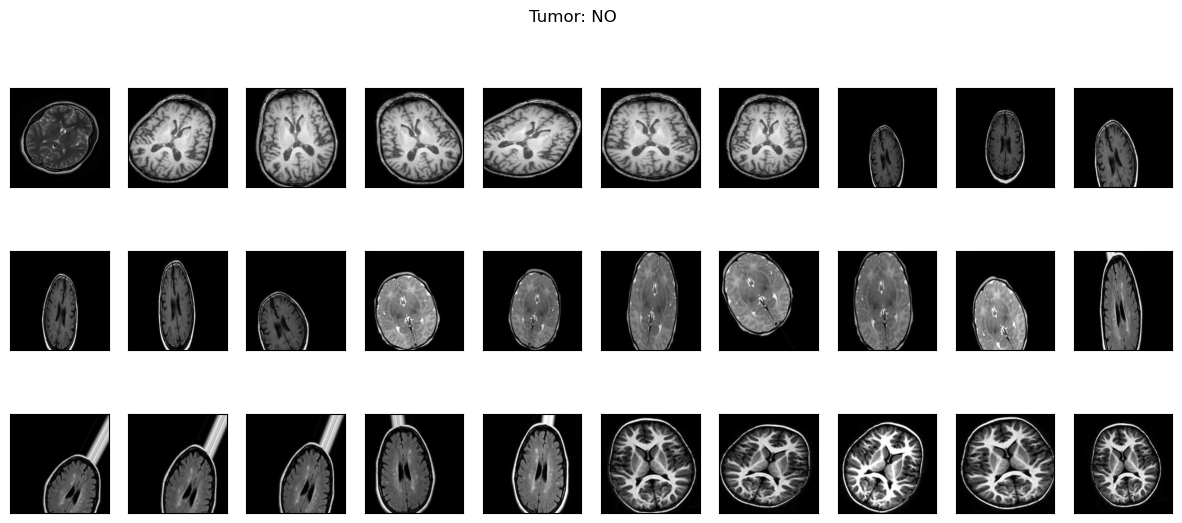

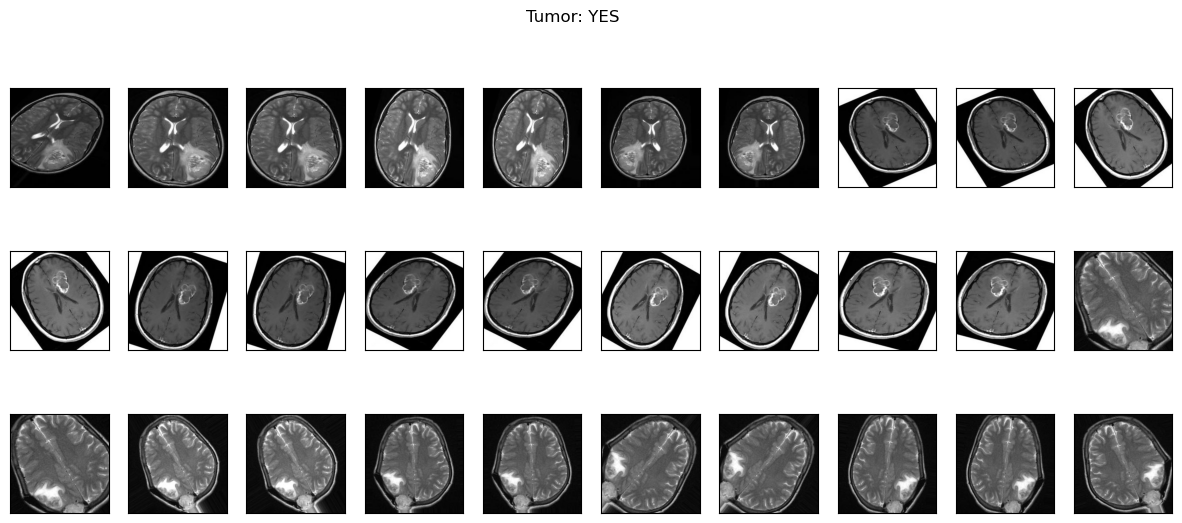

In [20]:
plot_samples(X_train, y_train, labels, 30)

In [66]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        

        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

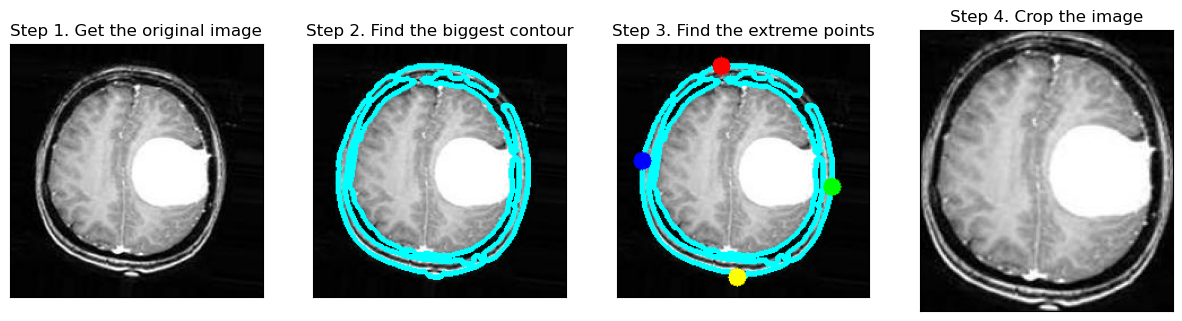

In [67]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [69]:
print(X_train)
X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8) array([[[0, 0, 0],
                                           [0, 0, 0],
                                           [0, 0, 0],
                              

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [70]:
base_Neural_Net= ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

for layer in base_Neural_Net.layers:
    layer.trainable = False

    
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy' , 'AUC']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 256)               0

In [88]:

TRAIN_DIR = 'TRAIN/'
VAL_DIR = 'VAL/'
RANDOM_SEED = 42
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)
validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 1946 images belonging to 2 classes.
Found 488 images belonging to 2 classes.


In [90]:
EPOCHS = 30
es = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=6
)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=25,
    callbacks=[es]
)

C:\Users\rokzc\AppData\Local\Temp\ipykernel_4948\3111095041.py:7: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/30
50/50 [==============================] - 107s 2s/step - loss: 0.1452 - accuracy: 0.9429 - auc: 0.9824 - val_loss: 0.2276 - val_accuracy: 0.9275 - val_auc: 0.9571
Epoch 2/30
50/50 [==============================] - 109s 2s/step - loss: 0.1282 - accuracy: 0.9605 - auc: 0.9849 - val_loss: 0.2405 - val_accuracy: 0.9000 - val_auc: 0.9532
Epoch 3/30
50/50 [==============================] - 108s 2s/step - loss: 0.1175 - accuracy: 0.9605 - auc: 0.9864 - val_loss: 0.2468 - val_accuracy: 0.8800 - val_auc: 0.9510
Epoch 4/30
50/50 [==============================] - 107s 2s/step - loss: 0.0944 - accuracy: 0.9617 - auc: 0.9926 - val_loss: 0.2722 - val_accuracy: 0.8925 - val_auc: 0.9470
Epoch 5/30
50/50 [==============================] - 108s 2s/step - loss: 0.0866 - accuracy: 0.9694 - auc: 0.9942 - val_loss: 0.3267 - val_accuracy: 0.8875 - val_auc: 0.9355
Epoch 6/30
50/50 [==============================] - 108s 2s/step - loss: 0.0693 - accuracy: 0.9787 - auc: 0.9968 - val_loss: 0.3391 - v

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

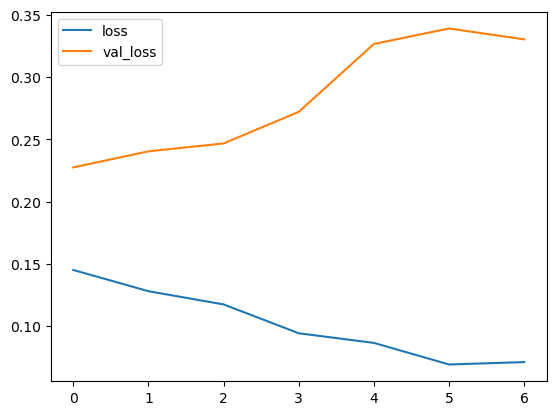

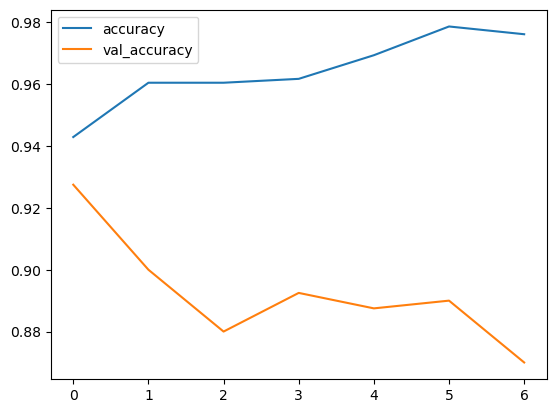

In [92]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [1]:
pred_new = model.predict(X_test)

for i in range(len(pred)):
    if pred_new[i] > 0.5:
        pred_new[i] = 1
    else:
        pred_new[i] = 0
     
pred_new = pred_new.astype(int)
test_acc=val_accuracy[-1]
print('Test accuracy: {:.2f}%'.format(test_acc*100))


NameError: name 'model' is not defined

In [107]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         5\n           1       1.00      1.00      1.00         5\n\n    accuracy                           1.00        10\n   macro avg       1.00      1.00      1.00        10\nweighted avg       1.00      1.00      1.00        10\n'